### Objective

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck by using passenger data (ie name, age, gender, socio-economic class, etc).

Competition Link: https://www.kaggle.com/c/titanic

History:
On April 15, 1912, during the Titanic voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

In [1]:
# Set-up 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
style.use('fivethirtyeight')
import seaborn as sns 

In [2]:
# Load training data
train_data = pd.read_csv("data/train.csv")
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test_data = pd.read_csv("data/test.csv")
# test_data.head(3)

# Data Exploration

In [4]:
train_data.shape

(891, 12)

In [5]:
df_titanic = pd.DataFrame(train_data)

In [6]:
df_titanic.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [7]:
# look at numeric and categorical values separately 
df_num = df_titanic[['Age','SibSp','Parch','Fare']]
df_cat = df_titanic[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


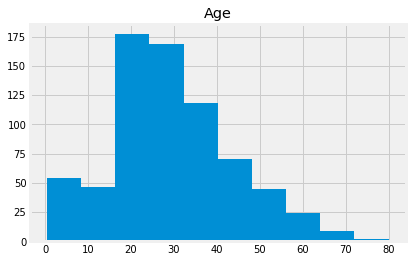

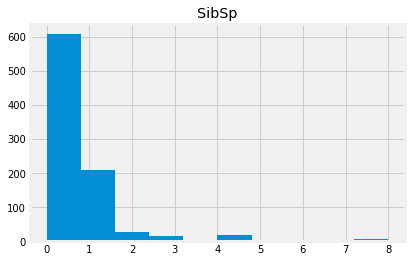

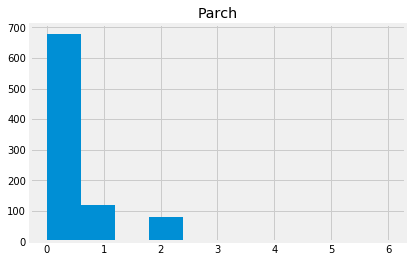

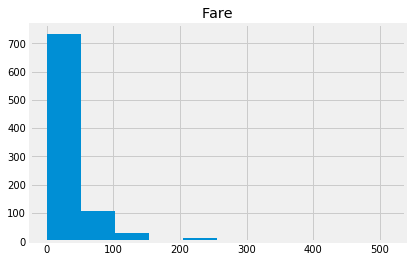

In [8]:
# histogram distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


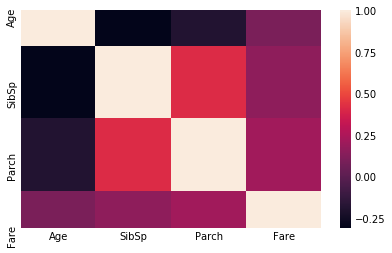

In [9]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [10]:
# compare survival rate across Age, SibSp, Parch, and Fare 
df_titanic_survival = pd.pivot_table(df_titanic, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])
# compare survival rate across Age, SibSp, Parch, and Fare 
df_titanic_survival

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Total number of Passengers : 891
Number of Passangers who did not survive: 549
Number of Passangers who did survive: 342


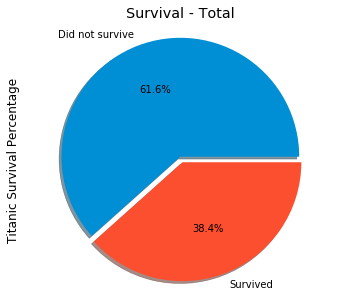

In [11]:
# Find out Survival from training dataset - Total

#Creating Gender DataFrame
survial_group = df_titanic.groupby("Survived")
survial_count = survial_group["Survived"].count()
survival_df = pd.DataFrame(survial_count)
rename_survival_df = survival_df.rename(columns={'Survived': 'Titanic Survival Percentage'})

print(f"Total number of Passengers : {survial_count.sum()}")
print(f"Number of Passangers who did not survive: {survial_count[0]}")
print(f"Number of Passangers who did survive: {survial_count[1]}")

#Creating and formatting Pie plot
explode = (0.05, 0)
survival_pieplot = rename_survival_df.plot.pie(subplots=True, explode=explode, figsize=(5,5), autopct='%1.1f%%', shadow=True, labels=["Did not survive","Survived"],legend=None)
plt.axis("equal")
plt.title("Survival - Total")

plt.show()


Total number of Passengers : 59.0
Number of Passangers who did not survive: 31.0
Number of Passangers who did survive: 31.0


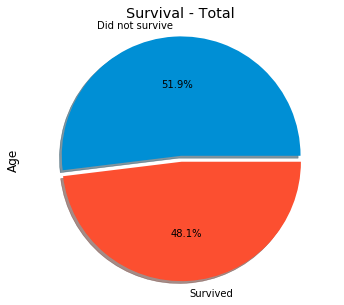

In [12]:
# Find out Survival from training dataset - Age

print(f"Total number of Passengers : {df_titanic_survival.Age.sum().round()}")
print(f"Number of Passangers who did not survive: {df_titanic_survival.Age[0].round()}")
print(f"Number of Passangers who did survive: {df_titanic_survival.Age[0].round()}")

#Creating and formatting Pie plot
explode = (0.05, 0)
survival_pieplot = df_titanic_survival.Age.plot.pie(subplots=True, explode=explode, figsize=(5,5), autopct='%1.1f%%', shadow=True, labels=["Did not survive","Survived"],legend=None)
plt.axis("equal")
plt.title("Survival - Total")

plt.show()


In [13]:
# Find out Survival from training dataset - Ticket class

In [14]:
# Find out Survival from training dataset - # of parents / children aboard the Titanic

In [15]:
# Find out Survival from training dataset - Gender

# Random Forest Classifier Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Assign X (data) and y (target)
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]

# Split into Training and Testing data
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Create model and fit
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# Making predictions
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

output.to_csv('submission.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
